In [ ]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x) # Adding dropout
    previous_block_activation = x  

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Activation("relu")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.0001  # <== here! default is 0.001
optimizer = RMSprop(learning_rate=learning_rate)  # Use RMSprop optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"], jit_compile=USE_JIT_COMPILE)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


val_accuracy: 0.7448

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x) # Adding dropout
    previous_block_activation = x  

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Activation("relu")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.0001  # <== here! default is 0.001
optimizer = Adam(learning_rate=learning_rate)  # Use Adam optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", MeanIoU(num_classes=2)], jit_compile=USE_JIT_COMPILE)
iou_callback = IoUCallback(val_ds)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


val_accuracy: 0.7241, IoU: 0.4211

In [ ]:
from tensorflow.keras.optimizers import Adadelta
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x) # Adding dropout
    previous_block_activation = x  

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Activation("relu")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.0001  # <== here! default is 0.001
optimizer = Adadelta(learning_rate=learning_rate)  # Use Adadelta optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", MeanIoU(num_classes=2)], jit_compile=USE_JIT_COMPILE)
iou_callback = IoUCallback(val_ds)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


val_accuracy: 0.7228, IoU: 0.4143 

In [ ]:
from tensorflow.keras.optimizers import Adagrad
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x) # Adding dropout
    previous_block_activation = x  

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Activation("relu")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.0001  # <== here! default is 0.001
optimizer = Adagrad(learning_rate=learning_rate)  # Use Adagrad optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", MeanIoU(num_classes=2)], jit_compile=USE_JIT_COMPILE)
iou_callback = IoUCallback(val_ds)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


val_accuracy: 0.7281, mean_io_u_2: 0.4140

In [ ]:
from tensorflow.keras.optimizers import SGD
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x) # Adding dropout
    previous_block_activation = x  

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.LeakyReLU()(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.25)(x) # Adding dropout
        x = layers.Activation("relu")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.0001  # <== here! default is 0.001
optimizer = SGD(learning_rate=learning_rate)  # Use SGD optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", MeanIoU(num_classes=2)], jit_compile=USE_JIT_COMPILE)
iou_callback = IoUCallback(val_ds)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


val_accuracy: 0.7268, mean_io_u_2: 0.4144

In [ ]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.7)(x) # Adding dropout
    previous_block_activation = x  

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.4)(x) # Adding dropout

        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.4)(x) # Adding dropout

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.LeakyReLU()(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.LeakyReLU()(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.0001  # <== here! default is 0.001
optimizer = RMSprop(learning_rate=learning_rate)  # Use RMSprop optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"], jit_compile=USE_JIT_COMPILE)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")

val_accuracy: 0.7283

In [ ]:
from tensorflow.keras.optimizers import Adadelta
import tensorflow.keras as keras
from tensorflow.keras import layers

def get_model(input_shape):
    inputs = keras.Input(input_shape)
    x = inputs

    ### [First half of the network: downsampling inputs] ###
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)  # Update dropout rate to 0.5
    previous_block_activation = x

    # Increased filter sizes and added more layers
    for filters in [128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)  # Update dropout rate to 0.5

        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)  # Update dropout rate to 0.5

        x = layers.AveragePooling2D(3, strides=2, padding="same")(x)  # Use AveragePooling2D instead of MaxPooling2D

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64]:
        x = layers.Activation("relu")(x)  # Use ReLU activation for entire blocks
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)  # Use ReLU activation for entire blocks
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model((BUFFER * 2, BUFFER * 2, Z_DIM))
model.summary()

learning_rate = 0.001  # Set an appropriate learning rate
optimizer = Adadelta(learning_rate=learning_rate)  # Use Adadelta optimizer

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"], jit_compile=USE_JIT_COMPILE)

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")

val_accuracy: 0.7284

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras

def get_model(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5)
    )
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6)
    )
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7)
    )
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8)
    )
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    learning_rate = 0.0001  # Set an appropriate learning rate for Adam
    optimizer = Adam(learning_rate=learning_rate)  # Use Adam optimizer

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy", MeanIoU(num_classes=2)], jit_compile=USE_JIT_COMPILE)
    iou_callback = IoUCallback(val_ds)
    return model

# USE_MIXED_PRECISION = True  # Set to True if mixed precision is used

input_shape = (BUFFER * 2, BUFFER * 2, Z_DIM)

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model(input_shape)
model.summary()

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


val_accuracy: 0.7283, iou: 0.4138

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras

def dice_loss(y_true, y_pred):
    smooth = 1.0
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return 1.0 - dice

def get_model(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5)
    )
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6)
    )
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7)
    )
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8)
    )
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    learning_rate = 0.0001  # Set an appropriate learning rate for Adam
    optimizer = Adam(learning_rate=learning_rate)  # Use Adam optimizer

    model.compile(optimizer=optimizer, loss=dice_loss, metrics=["accuracy"])
    return model

# USE_MIXED_PRECISION = True  # Set to True if mixed precision is used

input_shape = (BUFFER * 2, BUFFER * 2, Z_DIM)

if USE_MIXED_PRECISION:
    keras.mixed_precision.set_global_policy('mixed_float16')

model = get_model(input_shape)
model.summary()

model.fit(augmented_train_ds, validation_data=val_ds, epochs=15, steps_per_epoch=1500)
model.save("model.keras")


In [ ]:
val_accuracy: 0.2717, iou: 0.381

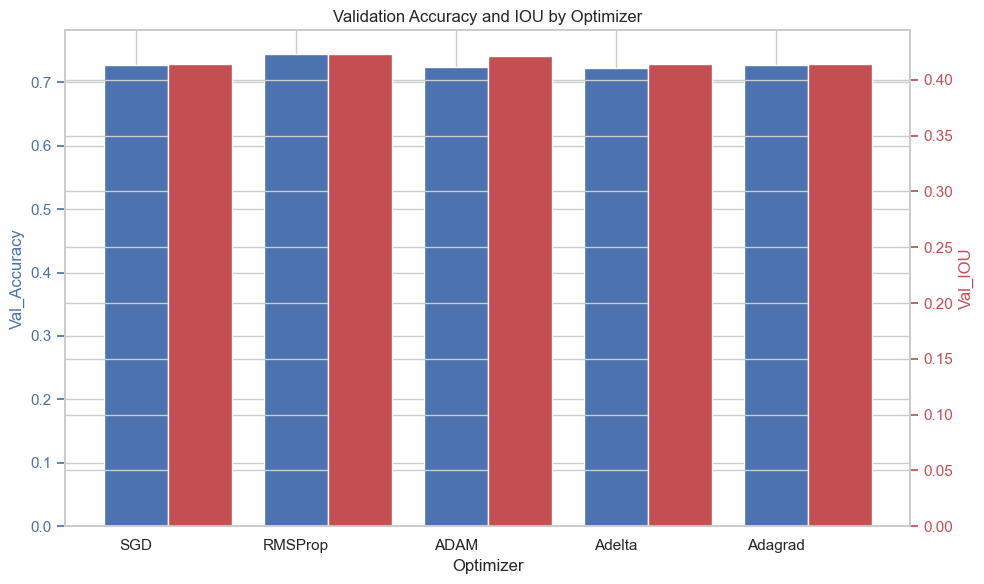

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
optimizers = ['SGD', 'RMSProp', 'ADAM', 'Adelta', 'Adagrad']
val_accuracy = [0.7268, 0.7448, 0.7241, 0.7228, 0.7281]
val_iou = [0.4144, 0.4232, 0.4211, 0.4143, 0.414]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Val_Accuracy
ax1.bar(np.arange(len(optimizers)), val_accuracy, color='b', width=0.4)
ax1.set_xlabel('Optimizer')
ax1.set_ylabel('Val_Accuracy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(np.arange(len(optimizers)))
ax1.set_xticklabels(optimizers)

# Create second y-axis
ax2 = ax1.twinx()

# Bar chart for Val_IOU
ax2.bar(np.arange(len(optimizers)) + 0.4, val_iou, color='r', width=0.4)
ax2.set_ylabel('Val_IOU', color='r')
ax2.tick_params('y', colors='r')

# Set title and show the plot
plt.title('Validation Accuracy and IOU by Optimizer')
plt.tight_layout()
plt.show()
